In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/dataset/linear_regression_dataset.csv")

In [8]:
df #dataframede featurelar ve valuelar arasında noktalı virgül bulunmaktadır.
   #bundan kurtulmak için data yüklenirken sep methodu kullanılır.
   #eğer seperator methoduna değer yazılmazsa default olarak virgülleri ayırır.
   #ancak bu datada noktalı virgüller bulunduğu için sep=";" yazmak gereklidir.
   #bir sonraki kod satrında deniyorum

,deneyim;maas
0,0.5;2500
1,0;2250
2,1;2750
3,5;8000
4,8;9000
5,4;6900
6,15;20000
7,7;8500
8,3;6000
9,2;3500


In [9]:
df = pd.read_csv("/content/drive/MyDrive/dataset/linear_regression_dataset.csv", sep=";")

In [10]:
df.head()  #dataframedeki featurelar ve valuelar birbirinden ayrılmıştır.

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


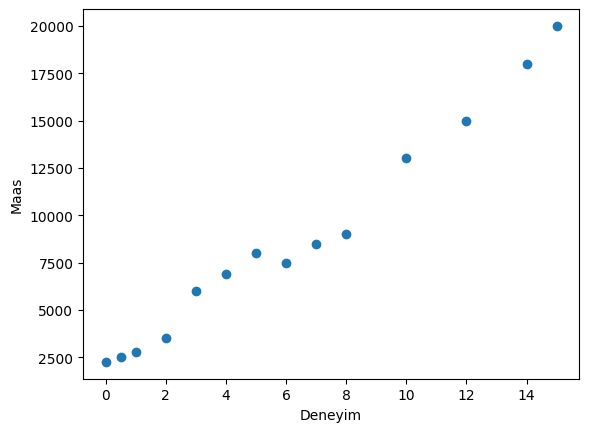

In [11]:
plt.scatter(df.deneyim,df.maas) #x ve y koordinatlarına hangi sütunların geleceği belirlenir.
plt.xlabel("Deneyim") #x ekseninin adı atanır
plt.ylabel("Maas")    #y ekseninin adı atanır.
plt.style.use ('ggplot')
plt.plot(marker='o',markersize=11)

plt.show()

In [12]:
#line'ı fit edebilmek için x ve y eksenlerine ihtiyaç vardır.
x = df.deneyim.values               #deneyim ve maas featureları pandas türünde bir seridir.
                                    #values methoduyla numpy türünde bir array'e çevrilir.

In [13]:
x.shape #bu feature 14 satır 1 sütundan oluşmaktadır.
        #Ancak sklearn (14,1) görmek ister.
        #bunun için reshape(-1,1) yazılırsa tüm satırların 1 sütundan oluştuğu belirtilmiş olur.

(14,)

In [14]:
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [15]:
from sklearn.linear_model import LinearRegression
#sklearn kütüphanesinin içinde machine learning modelleri bulunur.

linear_reg = LinearRegression() #LinearRegression modeli linear_reg adlı variable'a eşitlenir.
linear_reg.fit(x,y)             #line fit edilir.


LinearRegression()

In [16]:
#prediction
import numpy as np

b0 = linear_reg.predict([[0]]) #fit edilen line'ın b0 değişkenine yani y eksenini kestiği noktaya bakılır.
print("b0: ",b0)               #y eksenine kestiği noktada x değeri 0 olacağından y=b0'dır.

b0:  [[1663.89519747]]


In [17]:
b0_ = linear_reg.intercept_    #ayrıca b0 değeri değeri intercept methoduyla da bulunur.
print("b0: ",b0_) 

b0:  [1663.89519747]


In [18]:
b1 = linear_reg.coef_  #b1'in diğer adı coefficient'tır. coef methoduyla b1 değeri bulunur.
print("b1: ",b1)

b1:  [[1138.34819698]]


In [19]:
new_salary = 1663 + 1138*15 #15 yıllık deneyimi olan birinin maaşı linear regression denklemine göre hesaplanmıştır.
print(new_salary)

18733


In [20]:
y_head = linear_reg.predict(x)

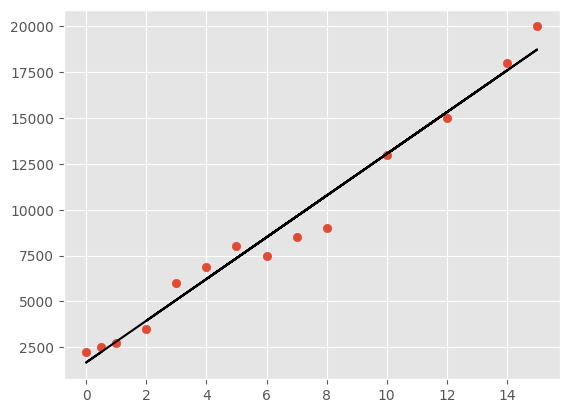

In [22]:
plt.plot(x, y_head, color="black")
plt.scatter(x,y)
plt.show()

In [23]:
from sklearn.metrics import r2_score
print("R Square Score: ",r2_score(y,y_head))

R Square Score:  0.9775283164949903


In [24]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y,y_head))

Mean Squared Error:  685945.845961494


In [25]:
MSE = np.square(np.subtract(y,y_head)).mean()
print("Mean Squared Error: ",MSE)

Mean Squared Error:  685945.845961494
